In [2]:
from sklearn.datasets import load_boston
data = load_boston()
x,y = data['data'],data['target']

In [3]:
x.shape

(506, 13)

In [4]:
from matplotlib import pyplot as plt

In [5]:
%matplotlib inline

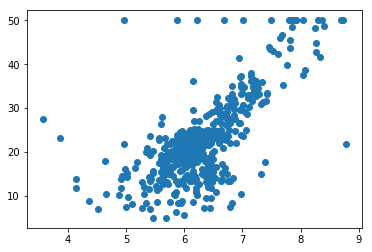

In [6]:
plt.scatter(x[:,5],y)

In [7]:
def price_by_randomkb(xm,k,b):
    return k*xm+b

In [8]:
abs(-5)

5

In [12]:
sum([-4,5])

1

In [8]:
def loss(y,y_hat):
    return sum(abs(y_i-y_hat_i) for y_i,y_hat_i in zip(list(y),list(y_hat)))/len(list(y)) 

# #使用绝对值损失函数，并求出partial_k,partial_b

In [28]:
import numpy as np
def partial_k(x,y,y_hat):
    m = len(list(y))
    gradient = 0
    for x_i,y_i,y_hat_i in zip(list(x),list(y),list(y_hat)):
        sign_y = np.sign(y_hat_i-y_i)
        gradient = gradient+ sign_y*x_i
    return gradient/m

In [29]:
partial_k(x[:,5],y,[price_by_randomkb(x,100,45) for x in x[:,5]])

6.284634387351787

In [31]:
partial_b(x[:,5],y,[price_by_randomkb(x,9,30) for x in x[:,5]])

1.0

In [30]:
def partial_b(x,y,y_hat):
    m = len(y)
    gradient = 0
    for y_i,y_hat_i in zip(list(y),list(y_hat)):
        sign_y = np.sign(y_hat_i-y_i)
        gradient = gradient+ sign_y
    return gradient/len(list(y))
    

In [38]:
import random
trying_times = 3000
learning_rate = 0.01
current_k = random.random()*100-100
current_b = random.random()*100-100
min_loss = float('inf')
update_time = 0
for i in range(trying_times):
    price = [price_by_randomkb(x,current_k,current_b) for x in x[:,5]]
    current_loss = loss(y,price)
    if current_loss<min_loss:
        min_loss = current_loss
        if i%50 == 0:
            print('when time is {},get best_k:{},best_b:{},and the loss is {}'.format(i,current_k,current_b,current_loss))
    k_gradient = partial_k(x[:,5],y,price)
    b_gradient = partial_b(x[:,5],y,price)
    current_k = current_k +(-1*k_gradient)*learning_rate
    current_b = current_b +(-1*b_gradient)*learning_rate

when time is 0,get best_k:-66.87802907812004,best_b:-63.1519778994197,and the loss is 505.98874552619594
when time is 50,get best_k:-63.7357118844442,best_b:-62.6519778994198,and the loss is 485.7404308348537
when time is 100,get best_k:-60.59339469076836,best_b:-62.1519778994199,and the loss is 465.4921161435114
when time is 150,get best_k:-57.45107749709253,best_b:-61.65197789942,and the loss is 445.2438014521699
when time is 200,get best_k:-54.30876030341669,best_b:-61.151977899420096,and the loss is 424.9954867608284
when time is 250,get best_k:-51.166443109740854,best_b:-60.651977899420196,and the loss is 404.7471720694869
when time is 300,get best_k:-48.02412591606502,best_b:-60.151977899420295,and the loss is 384.49885737814475
when time is 350,get best_k:-44.88180872238918,best_b:-59.651977899420395,and the loss is 364.25054268680293
when time is 400,get best_k:-41.739491528713344,best_b:-59.151977899420494,and the loss is 344.00222799546117
when time is 450,get best_k:-38.5971

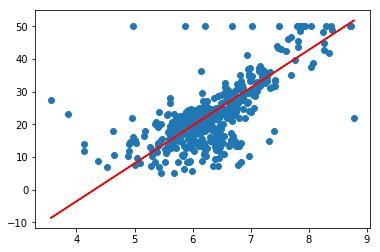

In [39]:
plt.scatter(x[:,5],y)
plt.plot(x[:,5],[11.6*x-50 for x in x[:,5]],'r')
plt.show()

In [48]:
def edit_dist(str1,str2):
    m,n = len(str1),len(str2)
    dp = [[0 for x in range(n+1)] for x in range(m+1)]
    for i in range(m+1):
        for j in range(n+1):
            if i == 0:
                dp[i][j] = j
            elif j == 0:
                dp[i][j] = i
            elif str1[i-1] == str2[j-1]:
                dp[i][j] = dp[i-1][j-1]
            else:
                dp[i][j] = min(dp[i-1][j]+1,dp[i][j-1]+1,dp[i-1][j-1]+1)
    return dp[m][n]

In [49]:
edit_dist('ABCDEF','ABCCE')

2

In [50]:
edit_dist('山东烟台大樱桃','烟台樱桃')

3

# parse solution of Edit distance

In [51]:
from functools import wraps

In [69]:
solution = {}
def lru_cache(func):
    cache = {}
    @wraps(func)
    def _wrap(str1,str2):
        if (str1,str2) in cache:
            result = cache[(str1,str2)]
        else:
            result = func(str1,str2)
            cache[(str1,str2)] = result
        return result
    return _wrap

In [71]:
@lru_cache
def edit_distance(str1,str2):
    if len(str1)== 0:
        return len(str2)
    if len(str2) == 0:
        return len(str1)
    tail_s1 = str1[-1]
    tail_s2 = str2[-1]
    candidates = [(edit_distance(str1[:-1],str2)+1,'DEL {}'.format(tail_s1)),(edit_distance(str1,str2[:-1])+1,'ADD {}'.format(tail_s2))]
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(str1[:-1],str2[:-1])+0,'')
    else:
        both_forward = (edit_distance(str1[:-1],str2[:-1])+1,'SUB {}=> {}'.format(str1[-1],str2[-1]))
    candidates.append(both_forward)
    min_distance,operation = min(candidates,key = lambda x: x[0])
    solution[(str1,str2)] = operation
    return min_distance

In [72]:
edit_distance('ABCCEF','ABCDF')

2

In [73]:
edit_distance('ABCDE','ABCCEF')

2

In [74]:
solution

{('A', 'A'): '',
 ('A', 'AB'): 'ADD B',
 ('A', 'ABC'): 'ADD C',
 ('A', 'ABCD'): 'ADD D',
 ('A', 'ABCDF'): 'ADD F',
 ('AB', 'A'): 'DEL B',
 ('AB', 'AB'): '',
 ('AB', 'ABC'): 'ADD C',
 ('AB', 'ABCD'): 'ADD D',
 ('AB', 'ABCDF'): 'ADD F',
 ('ABC', 'A'): 'DEL C',
 ('ABC', 'AB'): 'DEL C',
 ('ABC', 'ABC'): '',
 ('ABC', 'ABCD'): 'ADD D',
 ('ABC', 'ABCDF'): 'ADD F',
 ('ABCC', 'A'): 'DEL C',
 ('ABCC', 'AB'): 'DEL C',
 ('ABCC', 'ABC'): 'DEL C',
 ('ABCC', 'ABCD'): 'SUB C=> D',
 ('ABCC', 'ABCDF'): 'ADD F',
 ('ABCCE', 'A'): 'DEL E',
 ('ABCCE', 'AB'): 'DEL E',
 ('ABCCE', 'ABC'): 'DEL E',
 ('ABCCE', 'ABCD'): 'DEL E',
 ('ABCCE', 'ABCDF'): 'SUB E=> F',
 ('ABCCEF', 'A'): 'DEL F',
 ('ABCCEF', 'AB'): 'DEL F',
 ('ABCCEF', 'ABC'): 'DEL F',
 ('ABCCEF', 'ABCD'): 'DEL F',
 ('ABCCEF', 'ABCDF'): '',
 ('A', 'ABCC'): 'ADD C',
 ('A', 'ABCCE'): 'ADD E',
 ('A', 'ABCCEF'): 'ADD F',
 ('AB', 'ABCC'): 'ADD C',
 ('AB', 'ABCCE'): 'ADD E',
 ('AB', 'ABCCEF'): 'ADD F',
 ('ABC', 'ABCC'): 'ADD C',
 ('ABC', 'ABCCE'): 'ADD E',
 ('

In [75]:
edit_distance('1010','11100')

2

In [76]:
edit_distance('beijing','biejin')

3

In [77]:
solution

{('A', 'A'): '',
 ('A', 'AB'): 'ADD B',
 ('A', 'ABC'): 'ADD C',
 ('A', 'ABCD'): 'ADD D',
 ('A', 'ABCDF'): 'ADD F',
 ('AB', 'A'): 'DEL B',
 ('AB', 'AB'): '',
 ('AB', 'ABC'): 'ADD C',
 ('AB', 'ABCD'): 'ADD D',
 ('AB', 'ABCDF'): 'ADD F',
 ('ABC', 'A'): 'DEL C',
 ('ABC', 'AB'): 'DEL C',
 ('ABC', 'ABC'): '',
 ('ABC', 'ABCD'): 'ADD D',
 ('ABC', 'ABCDF'): 'ADD F',
 ('ABCC', 'A'): 'DEL C',
 ('ABCC', 'AB'): 'DEL C',
 ('ABCC', 'ABC'): 'DEL C',
 ('ABCC', 'ABCD'): 'SUB C=> D',
 ('ABCC', 'ABCDF'): 'ADD F',
 ('ABCCE', 'A'): 'DEL E',
 ('ABCCE', 'AB'): 'DEL E',
 ('ABCCE', 'ABC'): 'DEL E',
 ('ABCCE', 'ABCD'): 'DEL E',
 ('ABCCE', 'ABCDF'): 'SUB E=> F',
 ('ABCCEF', 'A'): 'DEL F',
 ('ABCCEF', 'AB'): 'DEL F',
 ('ABCCEF', 'ABC'): 'DEL F',
 ('ABCCEF', 'ABCD'): 'DEL F',
 ('ABCCEF', 'ABCDF'): '',
 ('A', 'ABCC'): 'ADD C',
 ('A', 'ABCCE'): 'ADD E',
 ('A', 'ABCCEF'): 'ADD F',
 ('AB', 'ABCC'): 'ADD C',
 ('AB', 'ABCCE'): 'ADD E',
 ('AB', 'ABCCEF'): 'ADD F',
 ('ABC', 'ABCC'): 'ADD C',
 ('ABC', 'ABCCE'): 'ADD E',
 ('

# Answer following questions


1、Why do we use Derivative / Gredient to fit a target function?
Ans:因为导数、梯度指出了损失函数下降最快的方向，加快算法的效率

2、In the words 'Gredient Descent', what's the Gredient and what's the Descent?
Ans:梯度指的是函数的导数，“下降”指的是使得损失函数下降的方向

3、What's the advantages of the 3rd gradient descent method compared to the previous methods?
Ans:第三种方向相对于前两种方法，方向是明确的，就是朝着梯度下降的方向，不是随机选择方向，效率更高

4、Using the simple words to describe: What's the machine leanring.
Ans:有监督：根据数据，不断调参，实现拟合；无监督：寻找数据之间的关系及规律

5、Why do we need dynamic programming? What's the difference of dynamic programming and previous talked search problme?
Ans:因为动态规划能将一个复杂的问题拆分成一个一个的小问题，先求解小问题的解，再通过不断循环得到复杂问题的解。和之前的搜索方法相比，时间复杂度、空间复杂度较高。

6、Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the  right answer based on inputs?
Ans:因为机器学习不是万能的，对于多变量的监督问题，机器学习适用。但是对于涉及到图论、二叉树中的一些动态规划问题，只能用DP算法。

7、Can you catch up at least 3 problems which could solved by Dynamic Programming?
Ans:斐波那契数列、编辑距离、最短路径问题

8、Can you catch up at least 3 problems wich could sloved by Edit Distance?
Ans:判断句子之间的相似度、句子纠错、打字联想

9、Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature.
Ans:分解为小问题、复杂度高、树形结构

10、What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)
Ans:时间复杂度、空间复杂度可能会很高